In [1]:
import pandas as pd
import calendar
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import mean_squared_error as mse
import sys


def get_csv(X):
    return pd.read_csv(path+X)

path = 'C:/Users/iamsh/Desktop/CS1 Kaggle Files/Given Files/'
path=''

calender, sales_train_ev, sales_train_val = get_csv('calendar.csv'), get_csv('sales_train_evaluation.csv'),\
                                                         get_csv('sales_train_validation.csv')


def feature_engineer_deploy(df, item_id):
    day_columns = list(df.columns[len(df.columns)-28:])
    other_var = list(df.columns[:6])
    
    df = pd.melt(df, id_vars = other_var, value_vars = day_columns)
    df = df.rename(columns = {"variable": "d", "value": "unit_sale"})
    # print(df.shape)

    cal_dict = dict(zip(calender.d,calender.date))
    df["date"] = df["d"].map(cal_dict)
    # df.head()
    
    day_of_week_dict = dict(zip(calender.d,calender.wday))
    df['day_of_week'] = df["d"].map(day_of_week_dict)

    month_no_dict = dict(zip(calender.d,calender.month))
    df['month_no'] = df["d"].map(month_no_dict)

    l = [i[-2:] for i in list(calender.date)]
    calender['day_of_month'] = l

    day_of_month_dict = dict(zip(calender.d,calender.day_of_month))
    df['day_of_month'] = df["d"].map(day_of_month_dict)
    
    df['day_of_month'] = df['day_of_month'].fillna(0)
    df = df.astype({'day_of_month': 'int32'})                   # Making day_of_month column as int
    df['date'] = df['date'].astype(str)
    
    if bool(len(df[df.id == item_id])):
        df = df[df.id == item_id]
    else:
        sys.exit('Try different item id, this item_id is non existent.') 
    y_test = df.unit_sale
    df = df.drop('unit_sale', 1)
    X_test = df
    return X_test, y_test

non_numeric_col_list = ['id','item_id','dept_id','cat_id','store_id','state_id','d', 'date']

# Encoding Categorical Columns
def encode_for_deploy(le, new_df):           
    for i in range(len(non_numeric_col_list)):
        new_df[non_numeric_col_list[i]] = le[i].transform( new_df[non_numeric_col_list[i]] )
    return new_df

In [11]:
def final(item_id):
    evaluation, validation = bool(item_id.find('evaluation')+1), bool(item_id.find('validation')+1)
    
    if evaluation:
        df = sales_train_ev.copy()
        X_test, y_test = feature_engineer_deploy(df, item_id)
        
        dept = X_test.dept_id.iloc[0]
        le = joblib.load('le_Eval_'+dept+'.pkl')
        model = joblib.load('Eval_'+str(dept)+'.pkl')
    
    if validation:
        df = sales_train_val.copy()
        X_test, y_test = feature_engineer_deploy(df, item_id)
        
        dept = X_test.dept_id.iloc[0]
        le = joblib.load('le_Val_'+dept+'.pkl')
        model = joblib.load('Val_'+str(dept)+'.pkl')
    
    X_test = encode_for_deploy(le, X_test)
    predicted = model.predict(X_test)
    
    return predicted
#     return predicted, y_test

In this section we predict next 28 days unit sales for given item id. 
<br>If the item is from eval data the 28 days correspond to 1914 to 1941
<br>If the item is from val data the 28 days correspond to 1886 to 1913

In [12]:
%%time
predicted = final('HOBBIES_2_100_WI_1_evaluation')

CPU times: user 1.83 s, sys: 200 ms, total: 2.04 s
Wall time: 1.53 s


In [13]:
predicted

array([0.31189659, 0.29574161, 0.27629394, 0.28537623, 0.35432811,
       0.4250914 , 0.46891706, 0.34481477, 0.33811694, 0.37868251,
       0.36617865, 0.46026329, 0.46846616, 0.47983339, 0.3313768 ,
       0.34917055, 0.33763268, 0.37579379, 0.40735598, 0.47864396,
       0.51433375, 0.36263476, 0.39386907, 0.3752295 , 0.38086602,
       0.41847144, 0.41626941, 0.39642796])

In this cell we slightly modified the final function to plot the predictions and actuals for the item id. Also we printed
the MSE.

MSE: 0.6616029988388477


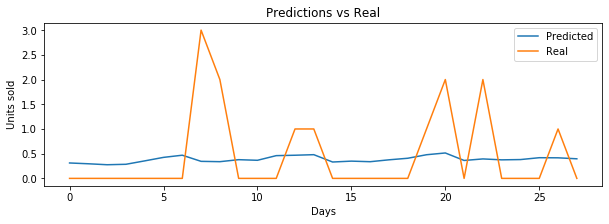

In [10]:
# predicted, y_test = final('HOBBIES_2_100_WI_1_evaluation')

# mse_score = mse(predicted, y_test)
# print('MSE:',mse_score)
# plt.figure(figsize=(10,3))
# plt.plot(list(predicted))
# plt.plot(list(y_test))
# plt.xlabel('Days')
# plt.ylabel('Units sold')
# plt.legend(['Predicted', 'Real'])
# plt.title('Predictions vs Real')
# plt.show() 

This final function only returns the MSE given the item id.

In [14]:
def final(item_id):
    evaluation, validation = bool(item_id.find('evaluation')+1), bool(item_id.find('validation')+1)
    
    if evaluation:
        df = sales_train_ev.copy()
        X_test, y_test = feature_engineer_deploy(df, item_id)
        
        dept = X_test.dept_id.iloc[0]
        le = joblib.load('le_Eval_'+dept+'.pkl')
        model = joblib.load('Eval_'+str(dept)+'.pkl')
    
    if validation:
        df = sales_train_val.copy()
        X_test, y_test = feature_engineer_deploy(df, item_id)
        
        dept = X_test.dept_id.iloc[0]
        le = joblib.load('le_Val_'+dept+'.pkl')
        model = joblib.load('Val_'+str(dept)+'.pkl')
    
    X_test = encode_for_deploy(le, X_test)
    predicted = model.predict(X_test)
    
    return mse(predicted, y_test)

In [15]:
final('HOBBIES_2_100_WI_1_evaluation')

0.6616029988388477

In [ ]:
#############################################################################################################################